In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt


path = 'DataScience_salaries_2024.csv'

salaries_df = pd.read_csv(path)

salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


* Encontrar si hubo un incremento salarial entre 2023 y 2024

In [2]:
# Formatting numbers in column 'salary_in_usd' as currency.
# salaries_df['salary_in_usd'] = salaries_df['salary_in_usd'].map('${:,.2f}'.format)
# salaries_df.head()

In [3]:
# Created a new data frame that only includes columns 'work_year' and 'salary_in_usd'
yearandsalary_df = salaries_df[['work_year', 'salary_in_usd']]
yearandsalary_df.head()

,work_year,salary_in_usd
0,2021,40038
1,2021,36259
2,2020,35735
3,2021,77364
4,2022,95386


In [4]:
# Created a new data frame that only includes 2023 in column 'work_year'
only2023salary_df = yearandsalary_df.drop(yearandsalary_df[yearandsalary_df['work_year'].isin([2020,2021,2022,2024])].index)
only2023salary_df.head()

,work_year,salary_in_usd
10,2023,60805
11,2023,60207
16,2023,48644
19,2023,43779
21,2023,38915


In [5]:
# Created a new data frame that only includes 2024 in column 'work_year'
only2024salary_df = yearandsalary_df.drop(yearandsalary_df[yearandsalary_df['work_year'].isin([2020,2021,2022,2023])].index)
only2024salary_df.head()

,work_year,salary_in_usd
20,2024,39615
33,2024,27611
66,2024,800000
68,2024,774000
69,2024,750000


In [6]:
# Calculate the average salary in 2023
average2023salary = only2023salary_df[only2023salary_df['work_year'] == 2023]['salary_in_usd'].mean()
print(f'The average salary in 2023 was ${average2023salary:.2f}')

The average salary in 2023 was $153732.66


In [7]:
# Calculate the average salary in 2024
average2024salary = only2024salary_df[only2024salary_df['work_year'] == 2024]['salary_in_usd'].mean()
print(f'The average salary in 2024 was ${average2024salary:.2f}')

The average salary in 2024 was $151510.09


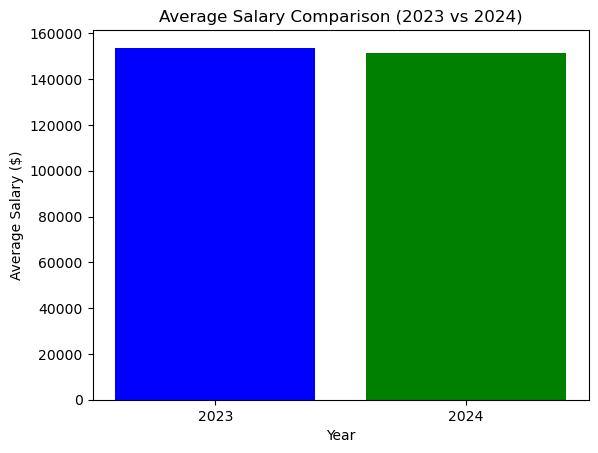

In [8]:
# Creating a bar plot

years = ['2023', '2024']
averages = [average2023salary, average2024salary]

plt.bar(years,averages, color=['blue', 'green'])
plt.xlabel('Year')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary Comparison (2023 vs 2024)')
plt.show()